# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources_3/city_data.csv")
ride_data_to_load = os.path.join("Resources_3/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,Unnamed: 4,Unnamed: 5,driver_count,type
0,Lake Jonathanshire,1/14/2019,13.83,5.739410e+12,NaN,NaN,5,Urban
1,South Michelleport,3/4/2019,30.24,2.343910e+12,NaN,NaN,72,Urban
2,Port Samanthamouth,2/24/2019,33.44,2.005070e+12,NaN,NaN,57,Urban
3,Rodneyfort,2/10/2019,23.44,5.149250e+12,NaN,NaN,34,Urban
4,South Jack,3/6/2019,34.58,3.908450e+12,NaN,NaN,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
sum_drivers = pyber_data_df.sum()["driver_count"]
sum_drivers

68709

In [5]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type.head(

SyntaxError: unexpected EOF while parsing (<ipython-input-5-652fef08da66>, line 3)

In [6]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares_by_type / total_rides_by_type
average_fare_per_ride.head()



type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_by_type / total_drivers_by_type
average_fare_per_driver.head()

NameError: name 'total_drivers_by_type' is not defined

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_rides_by_type,
      "Total Drivers": total_drivers_by_type,
      "Total Fares": total_fares_by_type,
      "Average Fare per Ride": average_fare_per_ride,
      "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

NameError: name 'total_drivers_by_type' is not defined

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

NameError: name 'pyber_summary_df' is not defined

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

NameError: name 'pyber_summary_df' is not defined

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,Unnamed: 4,Unnamed: 5,driver_count,type
0,Lake Jonathanshire,1/14/2019,13.83,5.739410e+12,NaN,NaN,5,Urban
1,South Michelleport,3/4/2019,30.24,2.343910e+12,NaN,NaN,72,Urban
2,Port Samanthamouth,2/24/2019,33.44,2.005070e+12,NaN,NaN,57,Urban
3,Rodneyfort,2/10/2019,23.44,5.149250e+12,NaN,NaN,34,Urban
4,South Jack,3/6/2019,34.58,3.908450e+12,NaN,NaN,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_merged_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
type_date_merged_df.tail(10)

fare
type  date            
Urban 4/8/2019  124.10
      4/9/2019  242.37
      5/1/2019  253.57
      5/2/2019  270.59
      5/3/2019  430.23
      5/4/2019  323.57
      5/5/2019  322.10
      5/6/2019  181.20
      5/7/2019  258.01
      5/8/2019  170.82

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date_merged_df = type_date_merged_df.reset_index()
type_date_merged_df.tail(10)

,type,date,fare
324,Urban,4/8/2019,124.10
325,Urban,4/9/2019,242.37
326,Urban,5/1/2019,253.57
327,Urban,5/2/2019,270.59
328,Urban,5/3/2019,430.23
329,Urban,5/4/2019,323.57
330,Urban,5/5/2019,322.10
331,Urban,5/6/2019,181.20
332,Urban,5/7/2019,258.01
333,Urban,5/8/2019,170.82


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_merged_pivot = type_date_merged_df.pivot(index="date", columns="type", values='fare')
type_date_merged_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019,43.69,128.52,127.78
1/10/2019,NaN,348.12,206.23
1/11/2019,16.42,200.05,433.86
1/12/2019,NaN,57.20,391.84
1/13/2019,NaN,137.26,189.35
...,...,...,...
5/4/2019,NaN,91.71,323.57
5/5/2019,26.53,154.78,322.10
5/6/2019,111.88,34.12,181.20


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
given_dates_df= type_date_merged_pivot.loc["2019-01-01":'2019-04-28']
given_dates_df


type,Rural,Suburban,Urban
date,,,


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
given_dates_df.index = pd.to_datetime(given_dates_df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
given_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
final_df = given_dates_df.resample('W').sum()
final_df

type,Rural,Suburban,Urban
date,,,


In [20]:
final_df.describe()

type,Rural,Suburban,Urban
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


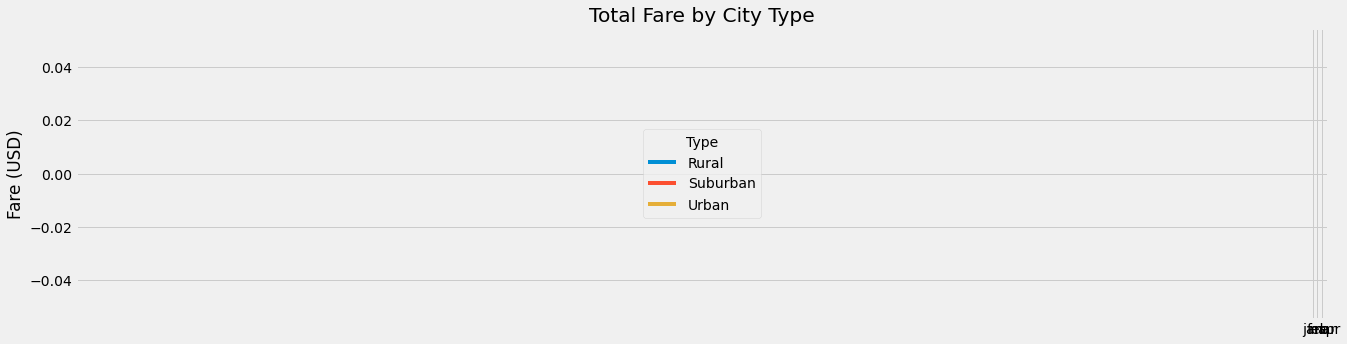

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


# Use the graph style fivethirtyeight.
ticker=["2019-01-06","2019-02-03","2019-03-03","2019-04-07"]
#ticker=["date"]
labels=["jan","feb","mar","apr"]
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(final_df)
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare (USD)")
plt.xticks(ticker,labels)
plt.legend(["Rural","Suburban","Urban"], loc="center", title="Type")

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()


